**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud

## Cargamos librarías

In [74]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego.guizanlopez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

**Carga de texto**

In [79]:
texto=""
with open('defino.txt', 'r') as fichero:
    linea = fichero.readline()
    while linea != '':
        linea = fichero.readline()
        texto += linea

In [69]:
from bs4 import BeautifulSoup

def get_http_data(text):
    texto=""
    for linea in text.split("\n"):
        aux=linea.strip()
        if aux and len(aux) > 50:
            texto += aux + "\n"
    return texto

In [118]:

import urllib3


ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

httpPool = urllib3.PoolManager()
uri= "https://espanol.almayadeen.net/noticias/politica/1780850/-israel--desmoviliza-reservistas-sin-anuncio-oficial"
request = httpPool.request('GET', uri,fields=None, headers=h)

#RECOGO SOLO EL TEXTO
soup = BeautifulSoup(request.data, 'html.parser')
text=""
for title in soup.find_all('p'):
        text+=title.get_text()
#text = get_http_data(BeautifulSoup(request.data,"html.parser").getText())
texto=text


In [129]:
from bs4 import BeautifulSoup
import urllib3
import json


ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

with open("URL.json","r") as f:
    urls = json.load(f)

URLS = list(map(lambda x: x['URL'],urls['periodicos']))
for url in URLS:
    httpPool = urllib3.PoolManager()

    request = httpPool.request('GET', url,fields=None, headers=h)

    soup = BeautifulSoup(request.data, 'html.parser')
    
    text+=" ".join(list(map(lambda x: x.text,soup.find_all(['h1','h2','h3','h4','h5','h6']))))

texto = text

In [130]:
texto

'SloganLa decisión responde al daño causado al mercado laboral por la ausencia de los israelíes en hogares y lugares de trabajo.El ejército de ocupación israelí desmovilizó a un gran número de reservistas sin hacer ningún anuncio oficial al respecto, reveló el diario Yedioth Ahronoth.De acuerdo con un alto oficial israelí citado por el periódico, el mando militar del régimen hará un esfuerzo adicional para desmovilizar más reservistas convocados, según la evaluación de la situación.La Institución de Seguridad también considera la posibilidad de reducir el número de soldados de reserva y devolverlos a sus actividades habituales.Según la prensa sionista la decisión responde al daño causado al mercado laboral por la ausencia de los israelíes en hogares y lugares de trabajo."Israel" llamó al campo de batalla a más de 350 mil reservistas después del 7 de octubre cuando inició la operación Diluvio de Al Alqsa.\xa0\xa0Canal Satelital Pan-árabe Informativo Independiente\nTodos los derechos res

**Limpeza do texto**

In [131]:
#Generación de lista de signos de puntuación

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
texto=' '.join(tokenizer.tokenize(texto))


punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

print(punctuation[:10]) #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']


In [132]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [133]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [134]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [135]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [136]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
black,24
friday,23
años,22
españa,19
barça,16
madrid,16
mejor,15
pide,15
sánchez,14
israel,12


**Mostrar gráfica de ocorrencias das palabras**

In [137]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

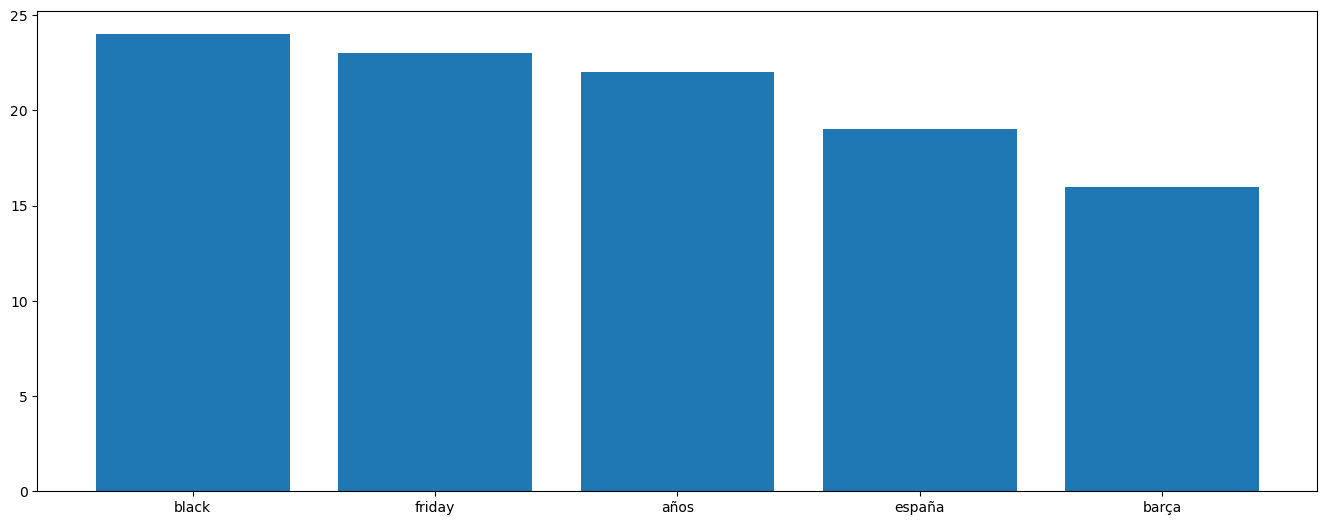

In [138]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

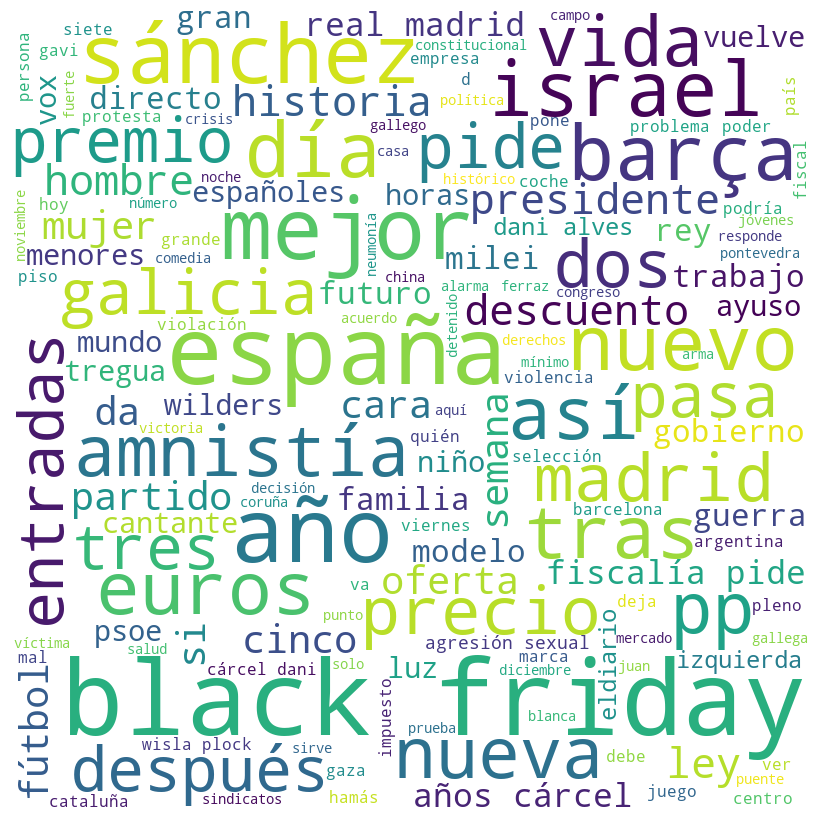

In [139]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()